In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yap6-heart-diseases-prediction/sample_submission.csv
/kaggle/input/yap6-heart-diseases-prediction/train.csv
/kaggle/input/yap6-heart-diseases-prediction/test.csv


**Import Libraries and data**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [3]:
df_train = pd.read_csv('/kaggle/input/yap6-heart-diseases-prediction/train.csv')
df_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df_train.shape

(70000, 13)

In [5]:
df_train.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
df_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
19703//365

53

In [8]:
df_train.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
df_train.active.value_counts()

1    56261
0    13739
Name: active, dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Scale the Data

In [11]:
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

X = X.drop(['id'], axis=1)

In [12]:
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [13]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

**Scale the Data**

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def scaling(X, scaler):
    XScaled = scaler.fit_transform(X)
    XScaled = pd.DataFrame(XScaled)
    XScaled.columns = X.columns
    return XScaled

In [15]:
XScaled = scaling(X,scaler)

In [16]:
XScaled.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.588076,1.0,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0
1,0.730159,0.0,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0
2,0.624003,0.0,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0
3,0.528455,1.0,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0
4,0.516918,0.0,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0


In [17]:
XScaled.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.671379,0.349571,0.560817,0.337925,0.017243,0.015052,0.183436,0.113229,0.088129,0.053771,0.803729
std,0.191038,0.476838,0.042103,0.075767,0.009525,0.017026,0.340125,0.286135,0.283484,0.225568,0.397179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.531630,0.000000,0.533333,0.289474,0.016698,0.013550,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.689508,0.000000,0.564103,0.326316,0.016698,0.013550,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.815254,1.000000,0.589744,0.378947,0.017934,0.014453,0.500000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Train Test Split**

In [18]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, 
                                                   train_size=0.9,
                                                   test_size = 0.1, random_state=100) # we have enough data so we select 90 percentage of test data

In [19]:
X_train.shape

(63000, 11)

In [20]:
X_test.shape

(7000, 11)

**PCA**

In [21]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [22]:
pca.components_

array([[-1.71500177e-02,  9.48021726e-01,  4.26147259e-02,
         2.37005079e-02,  1.22528475e-04,  4.29527597e-04,
        -5.23697557e-02, -3.28325030e-02,  2.81363214e-01,
         1.22312282e-01,  2.52316966e-02],
       [-8.15756481e-04,  3.27626163e-02,  2.46521869e-03,
         2.24648385e-03, -1.68057577e-04, -2.94969374e-04,
        -6.59926328e-02, -2.67260666e-02, -2.65476205e-02,
        -2.41855160e-02, -9.96270887e-01],
       [ 9.96150516e-02,  4.76278243e-02, -7.77041024e-04,
         3.34662713e-02,  6.29092001e-04,  1.09535472e-03,
         8.14068268e-01,  5.61285293e-01,  4.77266789e-02,
         4.24100645e-02, -6.97242174e-02],
       [-5.97155105e-02, -3.06060002e-01, -9.81126929e-03,
        -2.58330940e-03, -2.16581607e-04,  5.21841120e-05,
        -1.98590178e-03, -7.12020307e-02,  8.15407447e-01,
         4.80605274e-01, -4.13997757e-02],
       [-7.83332051e-02, -2.11699530e-02,  3.83204085e-03,
        -4.18015385e-03, -3.96823416e-04, -8.71325195e-04,
  

In [23]:
pca.explained_variance_ratio_

array([3.22259718e-01, 2.08390985e-01, 1.93819100e-01, 1.00288220e-01,
       6.81893542e-02, 5.14367145e-02, 4.62386932e-02, 7.31102291e-03,
       1.59791179e-03, 3.69672097e-04, 9.86075963e-05])

In [24]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

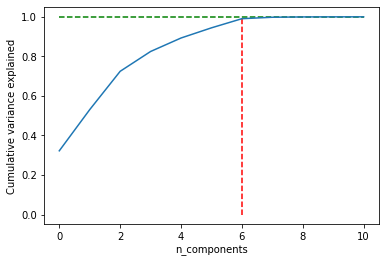

In [25]:
#Plotting the graph to identify best possible value for n_components
plt.vlines(x=6, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=1.0, xmax=10, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel("n_components")
plt.ylabel("Cumulative variance explained")
plt.show()

From the above graph we can say that almost 100% data variance can be explained by 6 components, so we are going to selects n_componets as 6 for PCA

In [26]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=6)
X_train_pca = pca_final.fit_transform(X_train)

In [27]:
X_train_pca.shape

(63000, 6)

In [28]:
X_test.shape

(7000, 11)

In [29]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(7000, 6)

**Logistic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
learner_pca = LogisticRegression()

In [32]:
model_pca = learner_pca.fit(X_train_pca, y_train)


In [33]:
pred_probs_test = model_pca.predict_proba(X_test_pca)

# Predict the Test set results
X_pred = learner_pca.predict(X_test_pca)

In [34]:
X_pred

array([0, 0, 1, ..., 0, 0, 1])

In [35]:
pred_probs_test

array([[0.56267891, 0.43732109],
       [0.53731158, 0.46268842],
       [0.46918998, 0.53081002],
       ...,
       [0.85335509, 0.14664491],
       [0.52849921, 0.47150079],
       [0.36088245, 0.63911755]])

In [36]:
from sklearn import metrics
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.68'

**Random Forest**

In [37]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7107


In [38]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7107


As the accuracy score is almost same with 10 vs 100 decision trees we can go with n_estimators as 10)

**Making predictions on external data i.e. test.csv file**

In [39]:
df_test = pd.read_csv("/kaggle/input/yap6-heart-diseases-prediction/test.csv")
df_test.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0,0,1
1,6,19042,2,170,69.0,130,90,1,1,0,0,1
2,7,20432,1,160,70.0,120,75,1,1,0,0,0
3,10,18133,2,185,94.0,130,90,1,1,0,0,1
4,11,16093,2,170,76.0,120,80,1,1,0,0,1


In [40]:
X_df_test = df_test.iloc[:,:]
X_df_test.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0,0,1
1,6,19042,2,170,69.0,130,90,1,1,0,0,1
2,7,20432,1,160,70.0,120,75,1,1,0,0,0
3,10,18133,2,185,94.0,130,90,1,1,0,0,1
4,11,16093,2,170,76.0,120,80,1,1,0,0,1


In [41]:
X_df_test = X_df_test.drop(['id'], axis=1)
X_df_test = scaling(X_df_test, scaler)

In [42]:
df_test_pca = pca_final.transform(X_df_test)
df_test_pca.shape

(30000, 6)

In [43]:
df_test.shape

(30000, 12)

logistic regression Submission

In [44]:
#ypred_df_test = learner_pca.predict(df_test_pca)
#df_test['cardio'] = ypred_df_test.reshape(-1)

Random Forest Submition

In [45]:
ypred_df_testrfc = rfc.predict(X_df_test)
df_test['cardio'] = ypred_df_testrfc.reshape(-1)

In [46]:
df_test[['id','cardio']].head()

,id,cardio
0,5,0
1,6,1
2,7,0
3,10,1
4,11,0


In [47]:
df_test[['id','cardio']].to_csv('submission.csv',index=False)